# Phase 1 Code Challenge Review 

_September 23, 2020_ 

TOPICS TO BE COVERED:
- Pandas Operations
- Data Visualization
- Statistics
- Python Data Structure

#### 1. Pandas Operations

In [65]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [78]:
# import data from a file 
df = sns.load_dataset('iris')

# what if this file is in a directory?

df2 = pd.read_csv('auto-mpg.csv')

CLASS NOTES:
<i>If this file is in a directory
    </i>

In [67]:
# examine the first few elements of it
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [79]:
# examine the dimensions of it
df.shape

(150, 5)

In [70]:
# check to see if you have missing values
df.isna().sum().any()
# any at the end to return a Boolean to is null?

False

In [87]:
# introduce some missing values
df.iloc[2,1:3] = np.nan
# df.isnull().sum()

In [88]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,NaN,NaN,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [89]:
# drop them
df = df.dropna(subset = ['sepal_width'], axis = 0)
# drops all missing values in the dataframe if no specs in brackets
# axis default is 0 for rows so you have to speccify for col as 1
# subset parameter allows to specify exactly what valued row you want to drop

In [90]:
df.shape

(149, 5)

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [82]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [18]:
# convert and modify columns

# create a new column, that is 10 times the sepal length, called sepal length 10
df['sepal_length_10'] = df['sepal_length'] * 10
df.head()
#this is called vectorizing and is more efficient than lambda function

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_len_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0,54.0


In [19]:
df['sepal_len_10_lambda'] = df['sepal_length'].map(lambda x: x * 10)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_len_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0,54.0


CLASS NOTES:
<i>applymap applies a function to all the values in the dataframe
 to the entire dataframe vs apply to a series or col
 str is a function so a lambda in this case is not required. The applymap simply maps all the values in the dataframe
    so is lambda used for parsing?????
    </i>

In [21]:
df_allstring = df.applymap(lambda x: str(x))


df_allstring.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_len_10_lambda
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0,54.0


In [22]:
#use applymap to multiply everything by 10 if its a float
df_by_10 = df.applymap(lambda x: x *10 if type(x) == float else x)
df_by_10.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_len_10_lambda
0,51.0,35.0,14.0,2.0,setosa,510.0,510.0
1,49.0,30.0,14.0,2.0,setosa,490.0,490.0
3,46.0,31.0,15.0,2.0,setosa,460.0,460.0
4,50.0,36.0,14.0,2.0,setosa,500.0,500.0
5,54.0,39.0,17.0,4.0,setosa,540.0,540.0


#### 2. Data Visualization

In [92]:
#how many species are there, and how many obs are in each species
df.species.value_counts()

virginica     50
versicolor    50
setosa        49
Name: species, dtype: int64

In [93]:
df.species.nunique()

3

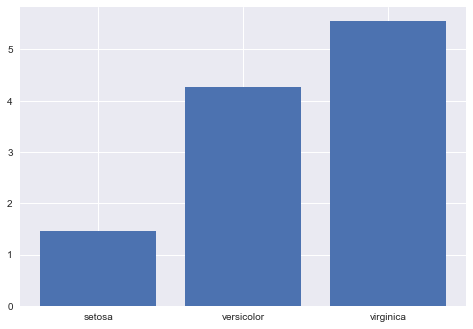

In [99]:
# let's plot the average pedal length for each species of iris 

y = df.groupby(['species'])['petal_length'].mean()
x = y.index
plt.bar(x,y);

In [95]:
y

species
setosa        1.465306
versicolor    4.260000
virginica     5.552000
Name: petal_length, dtype: float64

Text(0.5, 1.0, 'avg petal length')

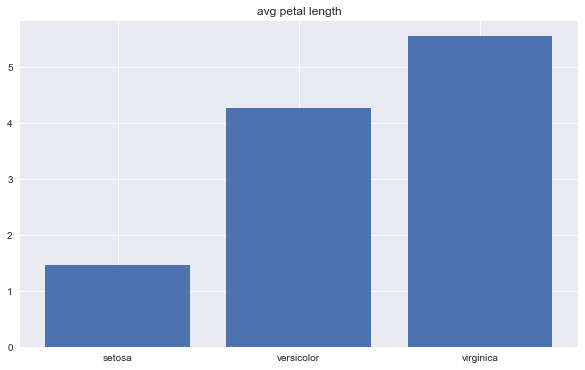

In [100]:
figure, ax = plt.subplots(figsize = (10,6))
ax.bar(x, y)
ax.set_title('avg petal length')
ax.set_

In [ ]:
# your turn - create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

plt.bar(persons, height)

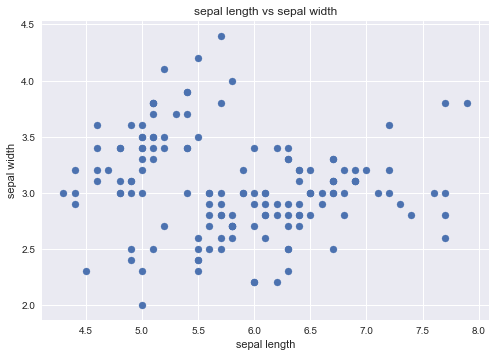

In [101]:
#what is the relationship between sepal length and sepal width
# scatterplot 
figure, ax = plt.subplots()

ax.set_title('sepal length vs sepal width')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

x = df.sepal_length
y = df.sepal_width

ax.scatter(x, y)

<i>The density of the data in the scatter falls mostly between 4.5 and 7 on the x-axis  leaning downwards, I would say there is a negative relation between the two. Also, since the spread of the data is fairly scattered, I conclude that visually I notice a weak negative relation between sepal length and sepal width.
    </i>

In [103]:
df.corr()
# returns a matrix of pairwise correlation
# be able to describe the relationship based on the visual plot and only 
# after read basically assesing understanding

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.115303,0.870066,0.815701
sepal_width,-0.115303,1.000000,-0.428329,-0.365487
petal_length,0.870066,-0.428329,1.000000,0.962424
petal_width,0.815701,-0.365487,0.962424,1.000000


Can you describe the relationship above?

#### 3. Statistics 

In [41]:
# calculate the mean and median value for sepal length 
df['sepal_length'].agg(['mean', 'median'])


mean      5.843333
median    5.800000
Name: sepal_length, dtype: float64

In [44]:
df[['sepal_length', 'sepal_width']].agg(['mean', 'median'])

,sepal_length,sepal_width
mean,5.843333,3.057333
median,5.800000,3.000000


In [45]:
df.describe().loc['mean', 'sepal_length']

5.843333333333334

In [46]:
df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [ ]:
# what can you say about the distribution of sepal length and sepal width based on this distribution?

This question again to test the understanding

In [135]:
get = {'get':[{'get':[{'get':'money'}]}]}
# get the money

In [56]:
# which flower has the longest petal? 
# what is the species of that flower?
longest_petal = df['sepal_length'].max()
df.loc[(df['sepal_length'] == longest_petal)]
# you can sort through and then get the first record

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [162]:
df.sort_values(['sepal_length'], ascending = False).iloc[[0]]

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica


In [163]:
df.loc()

#### 4. Python Data Structure 

In [58]:
groomer_info = { 'pets':
    [{'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon',
        'teams': ['Alert','Independent','Playful']
    }],
    'Chuck Norris': [{
        'age': 8,
        'type': 'Parrot',
        'teams': ['Talkative','Independent','Cheery']
    }],
    'Joe Rogan': [{
        'age': 2,
        'type': 'Labrador',
        'teams': ['Hyper','Playful','Energetic']
    }]}]
}    

In [134]:
groomer_info['pets'][0]['Chloe'][0]['age']

1

In [60]:
# loop through the dictionary, create a list of names 
# containing all pets' names
pet_names = list(groomer_info['pets'][0].keys())
pet_names

['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [111]:
# loop through the collection, create a list that contains all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']
pet_type= []
for name in pet_names:
    pet_type.append(groomer_info['pets'][0][name][0]['type'])
    
pet_type

['Pitbull', 'Maine Coon', 'Parrot', 'Labrador']

In [129]:
pet_types1 = []
for idx, name in enumerate(pet_names):
    pet_types1.append(groomer_info['pets'][0][name[idx]][0]['type'])
pet_types1

KeyError: 'G'

In [161]:
# create a function that returns the names of pets who is older than x years old

# the function should take in a dictionary containing all pet information, 
# and an integer indicating age you want to compare
def pets_older_than(pets, age):
    older_pet = []
    for name in pets['pets'][0].keys():
        if pets['pets'][0][name][0]['age'] > age:   
            older_pet.append(name)
    return older_pet
    pass
pets_older_than(groomer_info,4)

['Ginger', 'Chuck Norris']

is a way that we can create a collection without getting into a foor loop. The syntax for list comprehension is 
[syntax: expression for item in collection if *** else ***]

can also include conditions after the list comprehension
